# Project Description: Energy Consumption Analysis for Electric Vehicles

This project analyzes a dataset containing normal driving records for Roewe E50 electric vehicles collected over a period from June 5, 2015, to June 30, 2016. The dataset comprises detailed minute-by-minute data from over 10,000 trips, providing valuable insights into electric vehicle energy consumption patterns under various driving conditions.

# Importing Essential Libraries for Data Analysis, Visualization, and Model Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split

# Loading Electric Vehicle Energy Consumption Dataset

In [2]:
df = pd.read_csv("Electric Vehicle Trip Energy Consumption Data.csv")

In [3]:
df.head()

,Trip Energy Consumption,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length
0,0.672,1,6,10.333333,4,121.497948,31.281574,246.000000,2.583348,308.283333,31.000000,30.833333,13
1,0.896,1,6,16.000000,4,121.587564,31.256070,393.714286,2.985729,304.485714,29.000000,28.000000,18
2,1.344,1,7,16.090909,2,121.576968,31.262034,192.000000,2.354560,308.463636,31.272727,30.000000,21
3,1.344,1,8,19.000000,5,121.549709,31.257796,369.240000,1.540015,308.060000,30.000000,30.000000,16
4,0.896,1,6,14.166667,6,121.582280,31.215030,413.450617,9.659892,304.473457,28.000000,28.000000,129


In [4]:
df.tail()

,Trip Energy Consumption,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length
10146,6.048,50,36,14.500000,1,121.325082,31.263657,68.500000,1.570015,304.590000,30.100000,30.100000,65
10147,5.824,50,28,0.325000,2,121.269958,31.343371,46.925000,5.135015,309.820000,30.000000,28.325000,54
10148,7.840,50,43,1.562500,2,121.411333,31.053128,23.562500,1.743765,305.577083,30.000000,28.708333,65
10149,4.032,50,18,21.808511,2,121.467157,30.854289,19.276596,1.334057,308.397872,22.787234,22.574468,84
10150,1.120,50,6,23.000000,2,121.446612,30.903188,2.571429,0.638790,306.159184,24.000000,22.979592,53


In [5]:
df.describe()

,Trip Energy Consumption,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length
count,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000
mean,3.952449,23.725544,18.514728,13.683350,3.207270,121.344636,31.192769,62.162325,4.046153,305.319799,18.476042,17.452474,84.064920
std,2.838899,13.812557,13.073244,5.055271,1.993929,2.412927,6.820456,94.236249,5.753897,3.509373,5.981862,6.024834,56.591225
min,0.672000,1.000000,6.000000,0.000000,0.000000,48.156145,-645.073007,0.000000,-20.799985,282.604167,-2.039216,-3.225806,4.000000
25%,1.792000,12.000000,8.000000,10.000000,1.000000,121.229993,31.204136,11.322876,0.876345,303.645369,14.000000,12.896643,36.000000
50%,3.136000,23.000000,14.000000,14.047619,3.000000,121.353008,31.286416,31.833333,2.172015,305.403175,18.546154,17.466667,66.000000
75%,5.152000,35.000000,25.000000,17.583333,5.000000,121.441564,31.351568,67.648148,4.952193,307.636825,23.000000,22.000000,137.000000
max,20.832000,50.000000,97.000000,23.000000,6.000000,343.178931,114.008944,930.642857,85.233349,435.321429,33.859223,31.777778,393.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10151 entries, 0 to 10150
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Trip Energy Consumption              10151 non-null  float64
 1   Vehicle ID                           10151 non-null  int64  
 2   Trip Distance                        10151 non-null  int64  
 3   Time of Day                          10151 non-null  float64
 4   Day of the Week                      10151 non-null  int64  
 5   Longitude                            10151 non-null  float64
 6   Latitude                             10151 non-null  float64
 7   Speed                                10151 non-null  float64
 8   Current                              10151 non-null  float64
 9   Total Voltage                        10151 non-null  float64
 10  Maximum Cell Temperature of Battery  10151 non-null  float64
 11  Minimum Cell Temperature of 

The dataset comprises a total of 13 columns, all of which contain numerical data in either integer or floating-point format. Specifically, there are 9 columns with float64 data type, representing continuous measurements such as energy consumption, speed, voltage, and temperature values. The remaining 4 columns are of int64 data type, indicating categorical or count-based values such as vehicle ID, trip distance, day of the week, and trip time length.

In [7]:
df.shape

(10151, 13)

In [8]:
df.isnull().sum()

Trip Energy Consumption                0
Vehicle ID                             0
Trip Distance                          0
Time of Day                            0
Day of the Week                        0
Longitude                              0
Latitude                               0
Speed                                  0
Current                                0
Total Voltage                          0
Maximum Cell Temperature of Battery    0
Minimum Cell Temperature of Battery    0
Trip Time Length                       0
dtype: int64

By checking the null values there are no missing values in any of the columns within the dataset. 

In [9]:
df.duplicated().sum()

0

There is no duplicated rows

# Exploratory Data Visualization for Energy Consumption Analysis

## Q-Q Plot for Energy Consumption: Assessing Normality

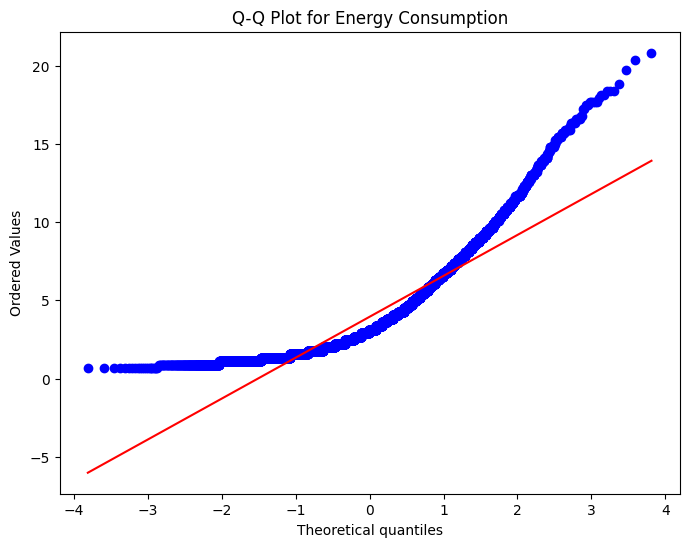

In [10]:
energy_consumption = df['Trip Energy Consumption']

plt.figure(figsize=(8, 6))
stats.probplot(energy_consumption, dist="norm", plot=plt)
plt.title("Q-Q Plot for Energy Consumption")
plt.show()


The Q-Q plot for energy consumption suggests a significant deviation from normality.In this plot, if the energy consumption values followed a normal distribution, the data points (in blue) would align closely along the red diagonal line. However, we observe that the points deviate upwards and downwards, especially in the tails.This indicates a heavy-tailed distribution with positive skewness, as the upper tail diverges sharply above the line, and there are several high-energy consumption values that extend far from the theoretical quantiles of a normal distribution.

<Axes: xlabel='Trip Distance', ylabel='Count'>

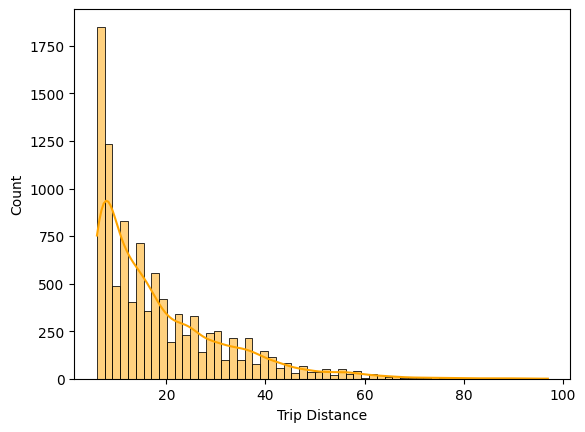

In [11]:
sns.histplot(df['Trip Distance'], kde=True,color='orange')


* The histogram with a KDE overlay for "Trip Distance" shows a highly right-skewed distribution.
* Most trips are concentrated in the lower distance range, specifically between 0 and 20 units.
* There is a steep drop-off in trip frequency as the distance increases.
* This indicates that the dataset predominantly consists of shorter trips, with fewer longer trips recorded.

<Axes: xlabel='Trip Energy Consumption', ylabel='Count'>

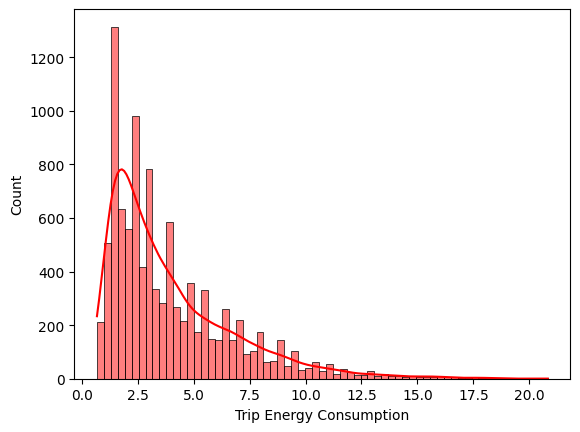

In [12]:
sns.histplot(df['Trip Energy Consumption'], kde=True,color='red')

* The histogram with a kernel density estimate (KDE) for "Trip Energy Consumption" shows a strong right-skew, similar to the distribution of "Trip Distance."
* Most values are concentrated in the lower range, around 0 to 5 units of energy consumption, with the frequency declining as energy consumption increases.
* This indicates that a large portion of trips consume relatively low amounts of energy, while higher energy consumption is less  common, though it does occur occasionally as seen in the long tail extending to the right.

<Axes: xlabel='Trip Energy Consumption', ylabel='Speed'>

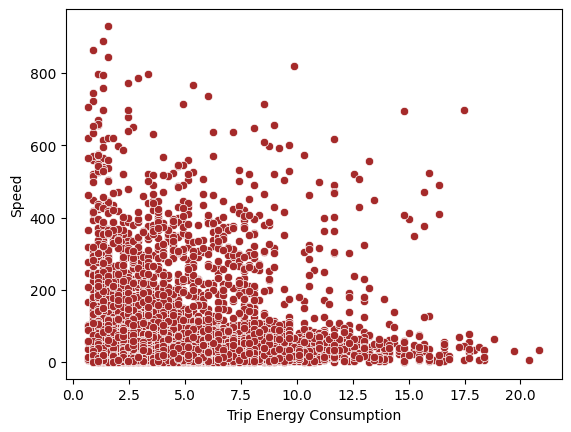

In [13]:
sns.scatterplot(x=df['Trip Energy Consumption'], y=df['Speed'],color='brown')

* From the scatter plot, we observe that as trip energy consumption increases, the range of observed speeds tends to decrease, especially at higher energy consumption levels.
* Most points are concentrated between 0.5 and 2.0 on the x-axis, where we see a wide spread of speeds, indicating that lower and medium energy consumption trips occur at a variety of speeds. 

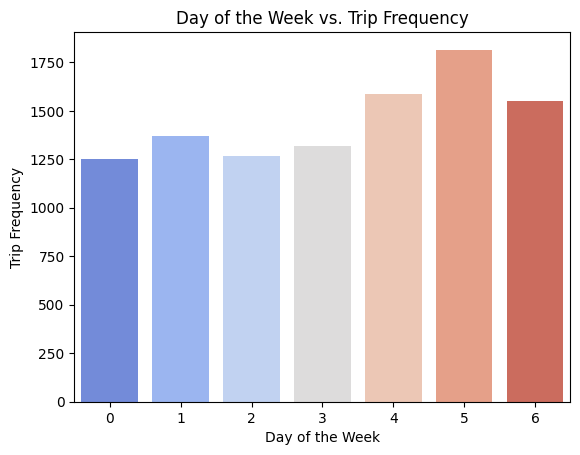

In [14]:
sns.countplot(x='Day of the Week', data=df, palette='coolwarm')
plt.title('Day of the Week vs. Trip Frequency')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Frequency')
plt.show()


* The bar chart displays the frequency of trips across different days of the week. 
* From this plot, we can observe some variation in trip frequency depending on the day. 
* The days labeled 5 and 6 (likely representing Friday and Saturday) have the highest trip counts, indicating a possible increase in travel on these days, which could be attributed to end-of-week activities or weekend travel patterns.
* In contrast, days labeled 0 to 3 (Sunday to Wednesday) generally show lower frequencies, suggesting that fewer trips occur earlier in the week.

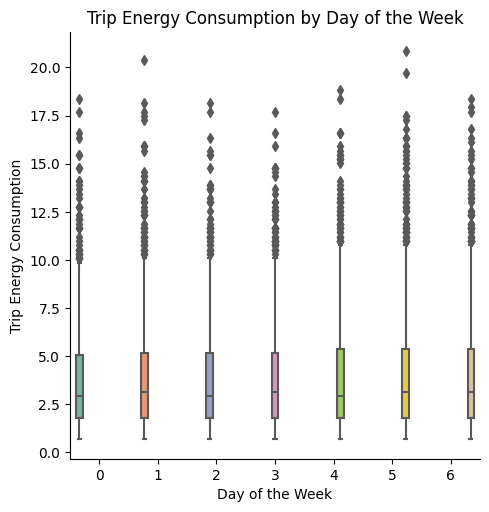

In [15]:
sns.catplot(x='Day of the Week', y='Trip Energy Consumption', data=df, kind='box', hue='Day of the Week', palette='Set2')

plt.title('Trip Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Energy Consumption')

plt.show()


* The box plot illustrates trip energy consumption across different days of the week, represented numerically from 0 to 6 on the x-axis. 
* The y-axis measures trip energy consumption levels, potentially in kilowatt-hours (kWh), with values ranging from 0 up to around 20. 
* Each box plot for the individual days provides a detailed look at the data’s distribution, showing the median trip energy consumption as the central line within each box. 
* The boxes represent the interquartile range (IQR), capturing the middle 50% of data points, while the whiskers extend to display variability outside this range.
* Points beyond the whiskers are marked as outliers, indicating trips with significantly higher energy consumption than usual.

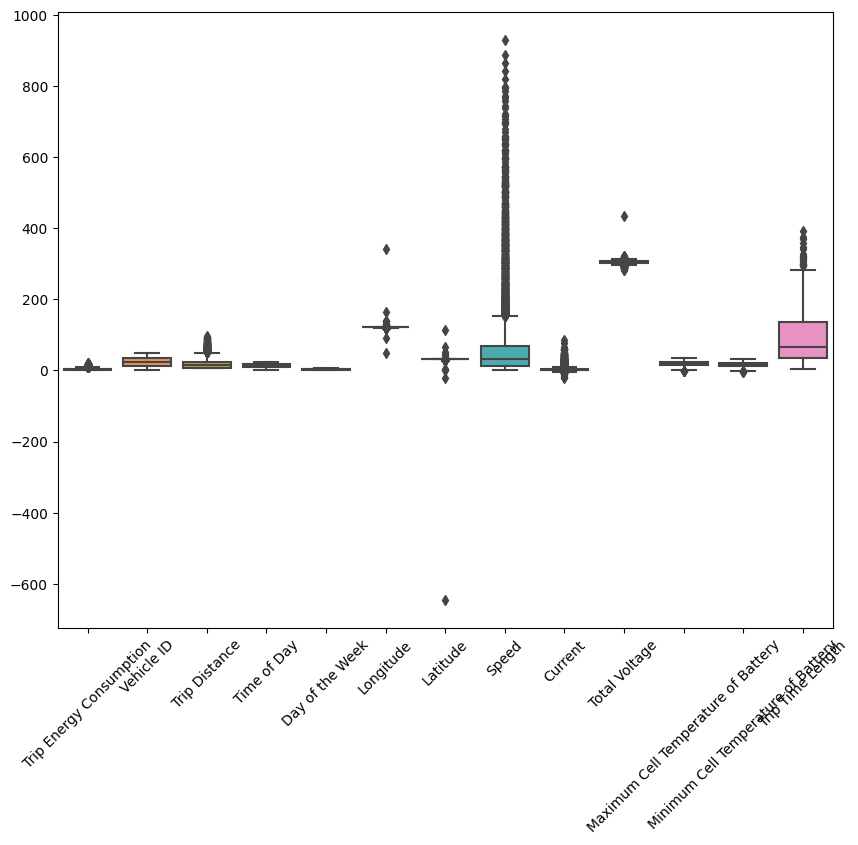

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


The boxplot provided showcases the distribution of several dataset features, highlighting both the range of values and the presence of outliers. Each feature on the x-axis represents a different variable, such as "Vehicle ID," "Trip Distance," "Speed," and "Trip energy consumption_log," with their corresponding values plotted on the y-axis. From this plot, it's evident that some features, like "Speed," exhibit a broad range with many positive outliers, indicating high variability and some extremely high values, while others, such as "Vehicle ID" and "Total Voltage," show a much tighter spread and fewer outliers.

<Axes: xlabel='Speed'>

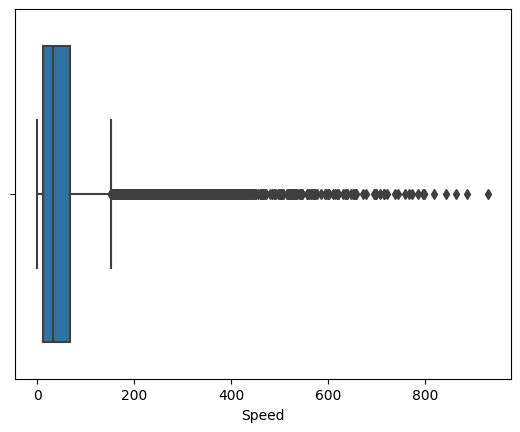

In [17]:
sns.boxplot(x=df['Speed'])

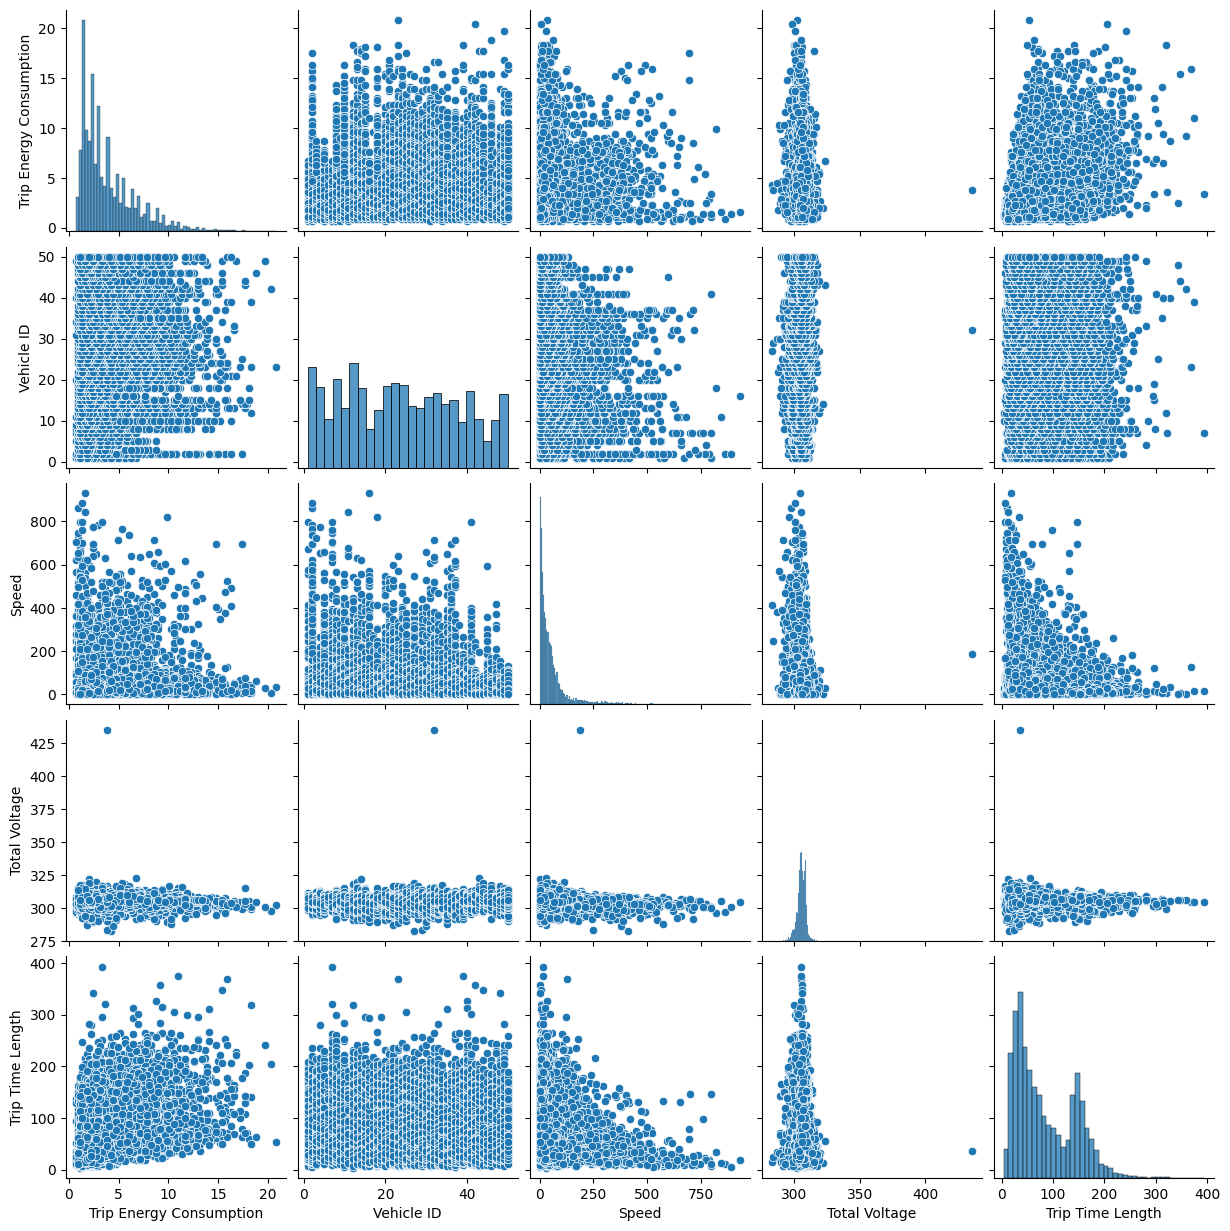

In [18]:
sns.pairplot(df[['Trip Energy Consumption','Vehicle ID','Speed','Total Voltage','Trip Time Length']])


The pairplot illustrates relationships among several key variables: "Trip energy_consumption_log," "Vehicle ID," "Speed," "Total Voltage," and "Trip Time Length." Diagonal plots show the distribution of each variable, with "Trip energy_consumption_log" and "Trip Time Length" following somewhat skewed distributions.

The "Trip energy_consumption_log" appears to increase with "Trip Time Length," suggesting that longer trips are associated with higher energy consumption. Similarly, "Speed" and "Trip Time Length" show a general trend where higher speeds are linked with shorter trip times, likely because higher speed reduces travel duration.

<Axes: >

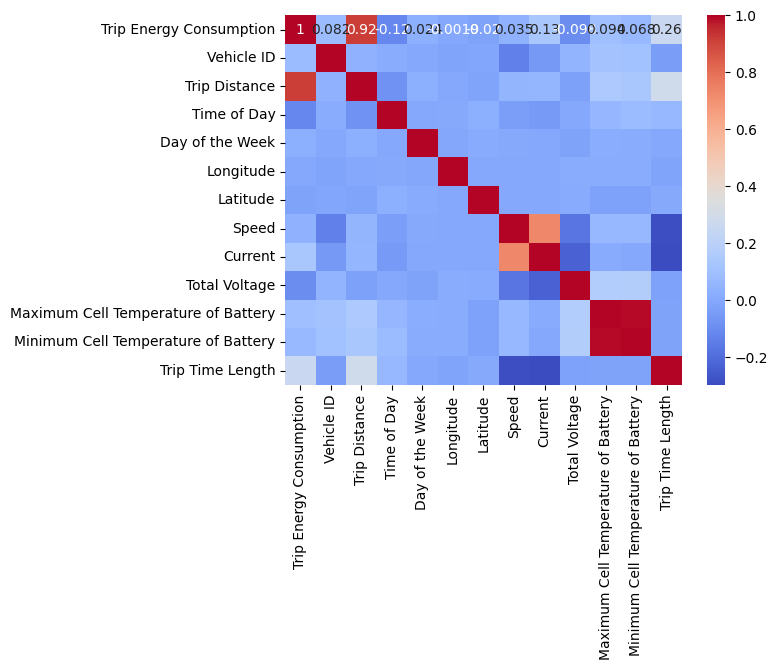

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


The correlation heatmap provides insights into the relationships between different features in the dataset. A value close to 1 indicates a strong positive correlation, while values closer to -1 show a strong negative correlation. Here, "Maximum Cell Temperature of Battery" and "Minimum Cell Temperature of Battery" display a moderate positive correlation, suggesting they tend to increase together. "Trip energy consumption_log" has some positive correlation with "Trip Time Length" and "Speed," indicating that longer and faster trips consume more energy.

## Normalization of Trip Energy Consumption

In [20]:
df['Trip Energy Consumption log'] = np.log(df['Trip Energy Consumption']+1)

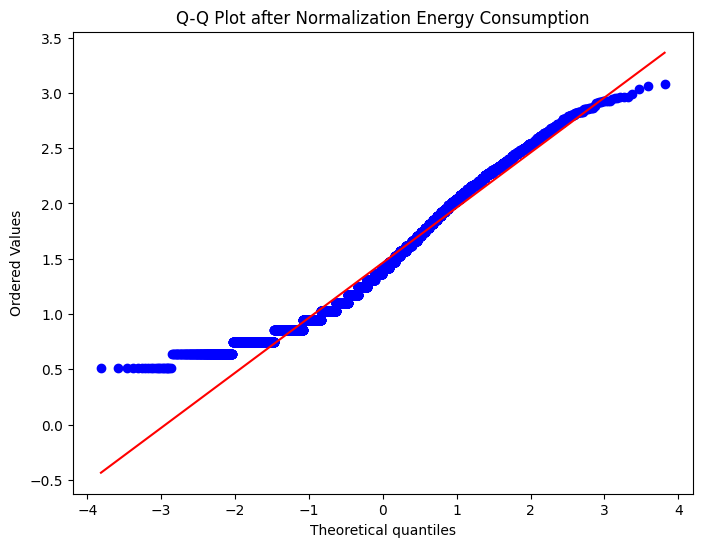

In [21]:
energy_consumption = df['Trip Energy Consumption log']

plt.figure(figsize=(8, 6))
stats.probplot(energy_consumption, dist="norm", plot=plt)
plt.title("Q-Q Plot after Normalization Energy Consumption")
plt.show()

* The Q-Q plot for energy consumption after applying the logarithmic transformation shows an improved alignment with the red diagonal line, indicating a closer approximation to a normal distribution.
* The points now follow the line more closely, especially in the central portion, suggesting that the log transformation has effectively reduced the skewness and mitigated the impact of extreme values that were present in the original distribution.
* However, there are still some deviations in the tails, especially in the upper range, where a few points drift slightly above the line.
* This indicates that while the data is now more normalized, it still retains some slight non-normal characteristics in the extremes.

In [22]:
df.drop('Trip Energy Consumption',axis=1,inplace=True)

# Outlier Detection and Handling in Speed Data

### Calculating Upper and Lower Limits for Speed Data to Detect Outliers

In [23]:
upper_limit = df['Speed'].mean() + 3 * df['Speed'].std()
lower_limit = df['Speed'].mean() - 3 * df['Speed'].std()

print(f"upper limit : {upper_limit}")
print(f"lower limit : {lower_limit}")

upper limit : 344.8710715442136
lower limit : -220.5464209645054


In [24]:
df.loc[(df['Speed']>upper_limit) | (df['Speed']<lower_limit)]

,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length,Trip Energy Consumption log
1,1,6,16.000000,4,121.587564,31.256070,393.714286,2.985729,304.485714,29.000000,28.000000,18,0.639746
3,1,8,19.000000,5,121.549709,31.257796,369.240000,1.540015,308.060000,30.000000,30.000000,16,0.851859
4,1,6,14.166667,6,121.582280,31.215030,413.450617,9.659892,304.473457,28.000000,28.000000,129,0.639746
6,1,6,14.000000,2,121.507915,31.281330,671.333333,11.783349,302.666667,29.750000,27.666667,9,0.751416
10,1,8,16.000000,4,121.572640,31.211389,559.275862,-1.999985,304.689655,31.000000,30.000000,21,0.639746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,41,29,20.975610,2,121.363893,31.241634,385.902439,22.209772,298.256098,17.365854,16.487805,46,1.984031
9346,45,7,10.461538,3,121.576321,31.165892,595.384615,27.176938,302.346154,23.000000,22.000000,10,0.851859
9363,45,8,10.000000,1,121.595337,31.241427,357.166667,25.216683,299.275000,15.000000,15.000000,15,0.943127
9562,47,6,18.000000,3,121.417824,31.121190,416.437500,5.256265,308.668750,27.000000,26.437500,13,0.639746


After applying outlier detection methods, a total of 286 rows containing outliers have been identified in the 'Speed' data across 13 columns.

## Filtering Outliers from Speed Data Based on Calculated Limits

In [25]:
new_df = df.loc[(df['Speed']<upper_limit) & (df['Speed']>lower_limit)]

In [26]:
new_df

,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length,Trip Energy Consumption log
0,1,6,10.333333,4,121.497948,31.281574,246.000000,2.583348,308.283333,31.000000,30.833333,13,0.514021
2,1,7,16.090909,2,121.576968,31.262034,192.000000,2.354560,308.463636,31.272727,30.000000,21,0.851859
5,1,6,18.548387,6,121.589980,31.284238,175.838710,-1.912888,304.648387,29.000000,29.000000,18,0.851859
7,1,12,9.675676,3,121.559338,31.260084,337.945946,6.072988,308.821622,30.000000,29.000000,21,1.175573
8,1,9,19.000000,3,121.556343,31.258021,275.500000,8.823825,307.964286,31.000000,30.571429,27,0.851859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10146,50,36,14.500000,1,121.325082,31.263657,68.500000,1.570015,304.590000,30.100000,30.100000,65,1.952744
10147,50,28,0.325000,2,121.269958,31.343371,46.925000,5.135015,309.820000,30.000000,28.325000,54,1.920446
10148,50,43,1.562500,2,121.411333,31.053128,23.562500,1.743765,305.577083,30.000000,28.708333,65,2.179287
10149,50,18,21.808511,2,121.467157,30.854289,19.276596,1.334057,308.397872,22.787234,22.574468,84,1.615818


After filtering outliers from the 'Speed' data based on the calculated upper and lower limits, the dataset now contains 9865 rows and 13 columns.

## After Filtering the outliers

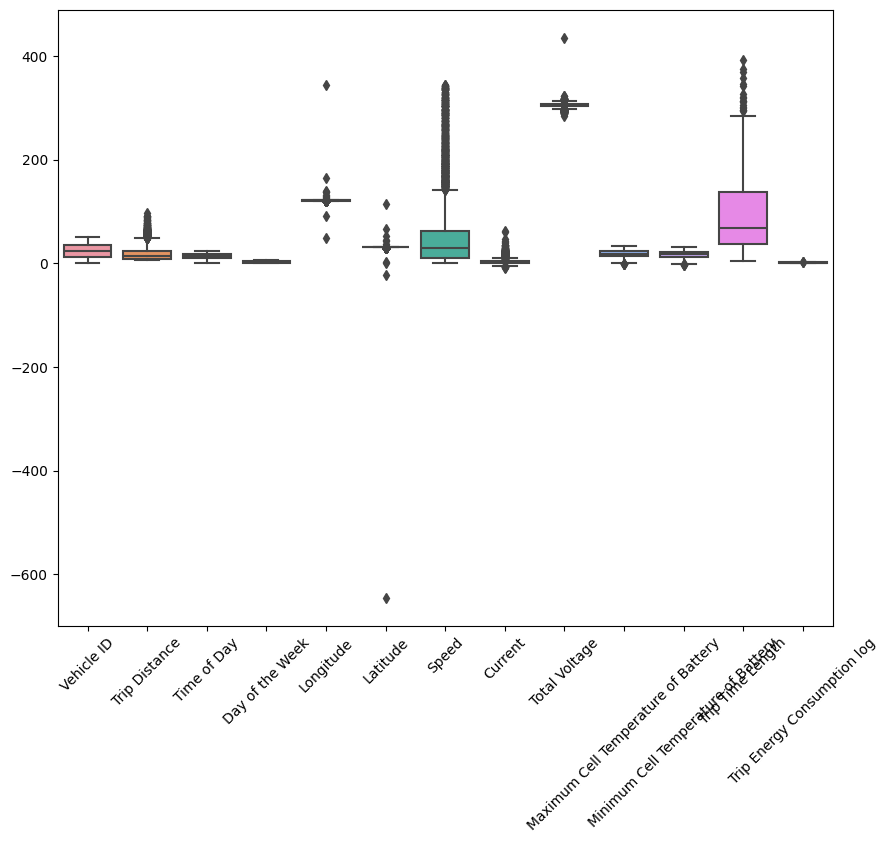

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(data=new_df)
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Speed'>

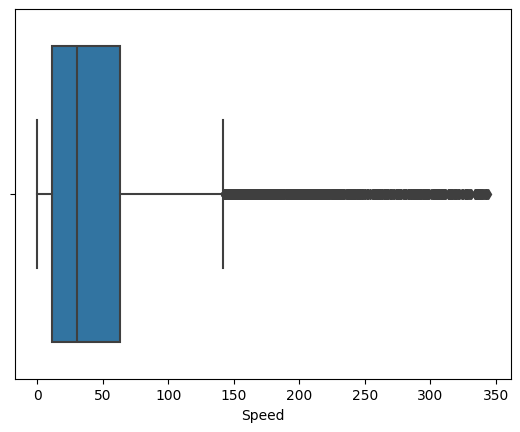

In [28]:
sns.boxplot(x=new_df['Speed'])

## Preparing Data for Model: Splitting Features and Target Variable

In [30]:
x = new_df.drop('Trip Energy Consumption log',axis=1)
y = new_df['Trip Energy Consumption log']

The dataset has been split into features (X) and target variable (y) in preparation for modeling.

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

The data has been split into training and testing sets using the train_test_split

In [32]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)


Training set shape: (7892, 12) (7892,)
Testing set shape: (1973, 12) (1973,)


The shapes of the training and testing sets have been printed to verify the data split